In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://github.com/Srushti-S/Innomatics_Research_Labs_Internship/raw/main/Laptop_Price_Prediction/laptop_details.csv')
data.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
data.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
s=data.head()['Feature'][0]
s

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [8]:
df = data.copy()

In [10]:
temp = [data.split('Processor')[0] for data in df['Feature']]
df['Feature'] = pd.DataFrame([data.split('Processor')[1] for data in df['Feature']])

In [11]:
df['Processor'] = pd.DataFrame(temp)

In [12]:
data['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [13]:
temp = [data.split('RAM')[0] for data in df['Feature']]

In [14]:
df['RAM'] = pd.DataFrame(temp)

In [15]:
df['Feature']

0       (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
1       (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
2       (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
3      8 GB DDR4 RAM64 bit Windows 10 Operating Syste...
4       (10th Gen)8 GB DDR4 RAMWindows 11 Operating S...
                             ...                        
715    4 GB LPDDR4 RAMChrome Operating System29.46 cm...
716    8 GB DDR4 RAM64 bit Windows 11 Operating Syste...
717    16 GB DDR5 RAM64 bit Windows 11 Operating Syst...
718     (12th Gen)16 GB LPDDR5 RAM64 bit Windows 11 O...
719     (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Oper...
Name: Feature, Length: 720, dtype: object

In [16]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(11th Gen)8 GB DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(11th Gen)8 GB DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",(10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(10th Gen)8 GB DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",8 GB DDR4 RAM64 bit Windows 10 Operating Syste...,AMD Ryzen 5 Hexa Core,8 GB DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",(10th Gen)8 GB DDR4 RAMWindows 11 Operating S...,Intel Core i5,(10th Gen)8 GB DDR4


In [18]:
import re

In [25]:
exp = '(?i)(AMD|Intel|Apple|Qualcomm)[a-z0-9 ]*Processor'
df['Processor'] = data.Feature.apply(lambda x: re.search(exp,x).group() if(re.search(exp,x)) else None)

df['Processor'].isnull().sum()

0

In [21]:
df.Processor.unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Intel Pentium Silver Processor', 'Apple M1 Max Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [24]:
rem_processor = ['Processor', 'Dual Core', 'Quad Core', 'Hexa Core', 'Octa Core']
for string in rem_processor:
    df['Processor'] = df.Processor.str.replace(string,'')
df['Processor'] = df.Processor.str.strip()

df['Processor']

0      Intel Core i3
1      Intel Core i3
2      Intel Core i3
3        AMD Ryzen 5
4      Intel Core i5
           ...      
715    Intel Celeron
716      AMD Ryzen 7
717      AMD Ryzen 9
718    Intel Core i7
719    Intel Core i5
Name: Processor, Length: 720, dtype: object

In [26]:
df.Processor[df.Processor == 'Intel OptaneIntel Core i3']

Series([], Name: Processor, dtype: object)

In [27]:
df.Processor[6] = 'Intel Core i3'
df.Processor[172] = 'Intel Core i3'

df.Processor[df.Processor == 'Intel Evo Core i5']

Series([], Name: Processor, dtype: object)

In [28]:
df.Processor[53] = 'Intel Core i5'
df.Processor[116] = 'Intel Core i5'

df.Processor[df.Processor == 'Intel Pentium Silver']

Series([], Name: Processor, dtype: object)

In [ ]:
df.Processor[94] = 'Intel Pentium'
df.Processor[235] = 'Intel Pentium'
df.Processor[389] = 'Intel Pentium'

In [29]:
df.Processor.unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel Core i3',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Core i5',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Intel Pentium Silver Processor', 'Apple M1 Max Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [31]:
exp = '[0-9]+ GB[ A-Z]*DDR[0-9]+[X]*|[0-9]+ GB Unified'
r = re.compile(exp)
temp_ram=data.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [32]:
df['RAM'] = pd.DataFrame(temp_ram)

In [33]:
exp = 'Mac|DOS|Chrome|Windows'
r = re.compile(exp)
temp_os=data.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [35]:
df['OS'] = pd.DataFrame(temp_os)

df.OS

0      Windows
1      Windows
2      Windows
3      Windows
4      Windows
        ...   
715     Chrome
716    Windows
717    Windows
718    Windows
719    Windows
Name: OS, Length: 720, dtype: object

In [36]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",(10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",8 GB DDR4 RAM64 bit Windows 10 Operating Syste...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",(10th Gen)8 GB DDR4 RAMWindows 11 Operating S...,Intel Core i5 Processor,8 GB DDR4,Windows


In [37]:
exp = '[0-9]+ [A-Z ]*HDD[\/][0-9]+ [A-Z ]*SSD|[0-9]+ [A-Z ]*HDD|[0-9]+ [A-Z ]*SSD|[0-9]+ [A-Z ]*EMMC'
r = re.compile(exp)
temp_hdd=data.Product.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [38]:
pd.DataFrame(temp_hdd).to_csv('HDD.csv', ',')

In [40]:
df['HDD'] = pd.DataFrame(temp_hdd)

df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,HDD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",(10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",8 GB DDR4 RAM64 bit Windows 10 Operating Syste...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4,Windows,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",(10th Gen)8 GB DDR4 RAMWindows 11 Operating S...,Intel Core i5 Processor,8 GB DDR4,Windows,512 GB SSD


In [42]:
exp = '[0-9.]+ inch|[0-9.]+ Inch'
r = re.compile(exp)
temp_display=data.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [43]:
df['Display'] = pd.DataFrame(temp_display)

In [44]:
df.Display=df.Display.str.replace('inch', '')
df.Display=df.Display.str.replace('Inch', '')
df.Display=df.Display.str.strip()

In [45]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,HDD,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,256 GB SSD,14
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,512 GB SSD,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",(10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3 Processor,8 GB DDR4,Windows,512 GB SSD,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",8 GB DDR4 RAM64 bit Windows 10 Operating Syste...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4,Windows,512 GB SSD,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",(10th Gen)8 GB DDR4 RAMWindows 11 Operating S...,Intel Core i5 Processor,8 GB DDR4,Windows,512 GB SSD,15.6


In [46]:
df.drop(columns=['Feature'], inplace=True)

In [47]:
df.RAM = pd.DataFrame([data.replace('GB','') for data in df.RAM])
df['RAM_size'] = pd.DataFrame([data.split()[0] for data in df.RAM])
df['RAM_type'] = pd.DataFrame([data.split()[-1] for data in df.RAM])

In [48]:
df.drop(columns='RAM', inplace=True)

In [49]:
df.RAM_type.value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
Unified     12
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_type, dtype: int64

In [50]:
df['MRP']=df.MRP.str.replace(u'\u20B9','')
df['MRP']=df.MRP.str.replace(',','')

In [51]:
df.HDD

0               256 GB SSD
1               512 GB SSD
2               512 GB SSD
3               512 GB SSD
4               512 GB SSD
              ...         
715             64 GB EMMC
716             512 GB SSD
717               1 TB SSD
718             512 GB SSD
719    1 TB HDD/256 GB SSD
Name: HDD, Length: 720, dtype: object

In [53]:
df.HDD = df.HDD.str.replace('GB', '')
df.HDD = df.HDD.str.replace('TB', '')
df.HDD

0             256  SSD
1             512  SSD
2             512  SSD
3             512  SSD
4             512  SSD
            ...       
715           64  EMMC
716           512  SSD
717             1  SSD
718           512  SSD
719    1  HDD/256  SSD
Name: HDD, Length: 720, dtype: object

In [54]:
exp = "[0-9 ]+SSD|[0-9 ]+EMMC"

temp_ssd=df.HDD.apply(lambda x: re.search(exp,str(x)).group() if(re.search(exp,str(x))) else None)

In [55]:
df['temp_ssd'] = pd.DataFrame(temp_ssd)

In [56]:
exp = "[0-9 ]+HDD"

temp_hdd=df.HDD.apply(lambda x: re.search(exp,str(x)).group() if(re.search(exp,str(x))) else None)

In [57]:
temp_hdd.isnull().sum()

672

In [58]:
df['temp_hdd'] = pd.DataFrame(temp_hdd)

In [59]:
temp_type = []

for data in df.HDD:
    if data:
        if ('HDD' in data) and ('SSD' in data):
            temp_type.append("Hybrid")
        elif ('HDD' in data) and ('SSD' not in data):
            temp_type.append("HDD")
        elif ('HDD' not in data) and ('SSD' in data):
            temp_type.append("SSD")
        else:
            temp_type.append("EMMC")
    else:
           temp_type.append(None)

In [60]:
df['HD_type'] = pd.DataFrame(temp_type)

In [61]:
df.temp_ssd

0      256  SSD
1      512  SSD
2      512  SSD
3      512  SSD
4      512  SSD
         ...   
715    64  EMMC
716    512  SSD
717      1  SSD
718    512  SSD
719    256  SSD
Name: temp_ssd, Length: 720, dtype: object

In [62]:
df.temp_ssd = df.temp_ssd.str.replace('SSD','')
df.temp_ssd = df.temp_ssd.str.replace('EMMC','')
df.temp_hdd = df.temp_hdd.str.replace('HDD','')
df.temp_ssd = df.temp_ssd.str.strip()
df.temp_hdd = df.temp_hdd.str.strip()

In [63]:
hdd_size = []
for data in df.temp_hdd:
    if data:
        if len(data)>1:
            hdd_size.append(data)
        else:
            hdd_size.append(str(1000 * int(data)))
    else:
        hdd_size.append(None)

In [64]:
pd.DataFrame(hdd_size).isnull().sum()

0    672
dtype: int64

In [65]:
df.temp_hdd = pd.DataFrame(hdd_size)

In [66]:
df.temp_ssd

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719    256
Name: temp_ssd, Length: 720, dtype: object

In [67]:
ssd_size = []

for data in df.temp_ssd:
    if data:
        if len(data)>1:
            ssd_size.append(data)
        else:
            ssd_size.append(str(1000 * int(data)))
    else:
        ssd_size.append(None)

In [68]:
df.temp_ssd = pd.DataFrame(ssd_size)

In [70]:
HD_size = []

for s1, s2 in zip(df.temp_ssd, df.temp_hdd):
    if s1 or s2:
        if s1 and s2:
            HD_size.append(int(s1)+int(s2))
        elif s1 and not s2:
            HD_size.append(int(s1))
        elif not s1 and s2:
            HD_size.append(int(s2))
    else:
        HD_size.append(None)

In [71]:
df['HD_size'] = pd.DataFrame(HD_size)

In [72]:
df.head()

,Product,Rating,MRP,Processor,OS,HDD,Display,RAM_size,RAM_type,temp_ssd,temp_hdd,HD_type,HD_size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor,Windows,256 SSD,14,8,DDR4,256,None,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor,Windows,512 SSD,15.6,8,DDR4,512,None,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor,Windows,512 SSD,15.6,8,DDR4,512,None,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor,Windows,512 SSD,15.6,8,DDR4,512,None,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor,Windows,512 SSD,15.6,8,DDR4,512,None,SSD,512


In [73]:
df.drop(columns=['temp_ssd', 'temp_hdd'], inplace=True)

df.drop(columns=['HDD'], inplace=True)

In [74]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor,Windows,14,8,DDR4,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor,Windows,15.6,8,DDR4,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor,Windows,15.6,8,DDR4,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor,Windows,15.6,8,DDR4,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor,Windows,15.6,8,DDR4,SSD,512


In [75]:
df['Product'] = pd.DataFrame([data.split()[0] for data in df.Product])

In [76]:
df.Product=df.Product.str.strip()

df.head()

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel Core i3 Processor,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel Core i3 Processor,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel Core i3 Processor,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD Ryzen 5 Hexa Core Processor,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel Core i5 Processor,Windows,15.6,8,DDR4,SSD,512


In [77]:
df.Product.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [78]:
df.Rating.isnull().sum()

139

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Processor  720 non-null    object 
 4   OS         720 non-null    object 
 5   Display    718 non-null    object 
 6   RAM_size   720 non-null    object 
 7   RAM_type   720 non-null    object 
 8   HD_type    720 non-null    object 
 9   HD_size    720 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 56.4+ KB


In [80]:
convert_type = {
    'MRP': int,
    'Display':float,
    'RAM_size':int,
    'HD_size':int
}
df = df.astype(convert_type)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int64  
 3   Processor  720 non-null    object 
 4   OS         720 non-null    object 
 5   Display    718 non-null    float64
 6   RAM_size   720 non-null    int64  
 7   RAM_type   720 non-null    object 
 8   HD_type    720 non-null    object 
 9   HD_size    720 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 56.4+ KB


<Axes: ylabel='Product'>

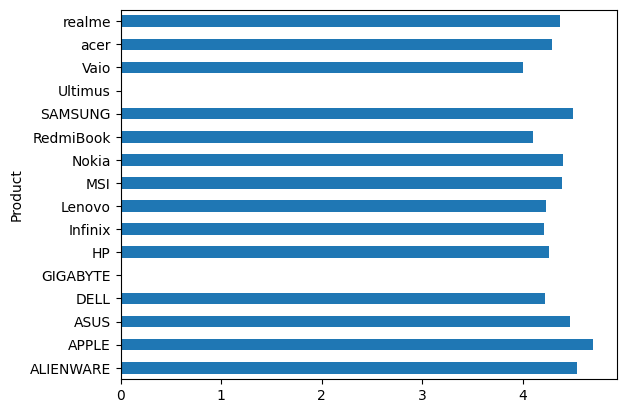

In [82]:
df.groupby('Product')['Rating'].mean().plot(kind='barh')

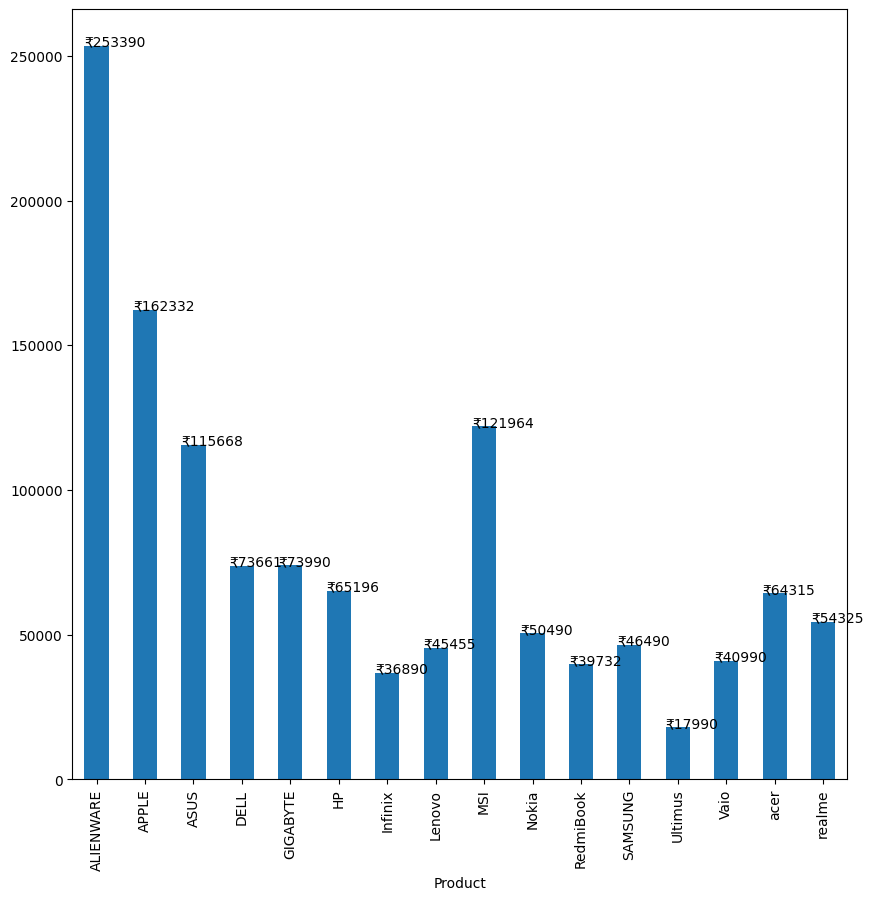

In [84]:
x = df.groupby('Product')['MRP'].mean().plot(kind='bar', figsize=(10,10))
for p in x.patches:
    x.annotate(u'\u20B9{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+3))

In [85]:
n_features = [feature for feature in df.columns if df[feature].dtypes!='O']
n_features

['Rating', 'MRP', 'Display', 'RAM_size', 'HD_size']

In [86]:
c_features = [feature for feature in df.columns if(df[feature].dtypes=='O')]
c_features

['Product', 'Processor', 'OS', 'RAM_type', 'HD_type']

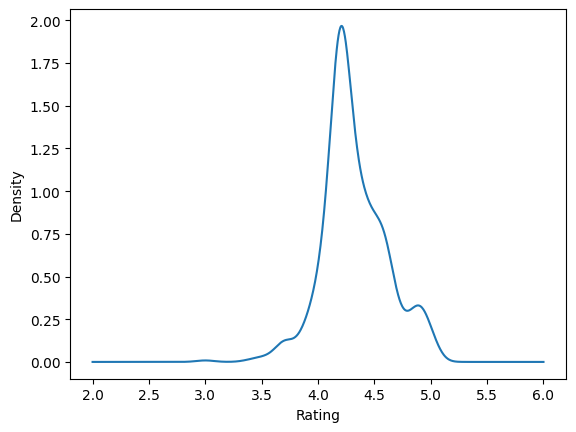

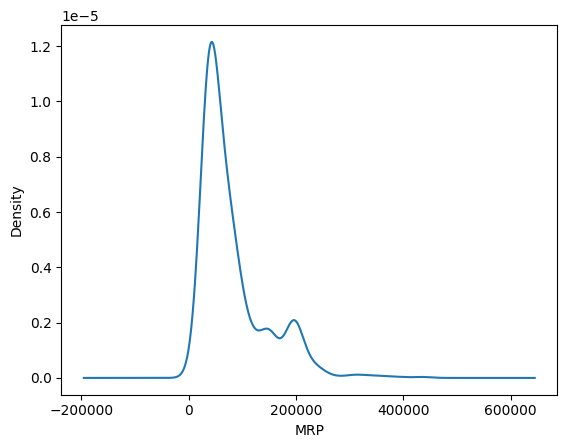

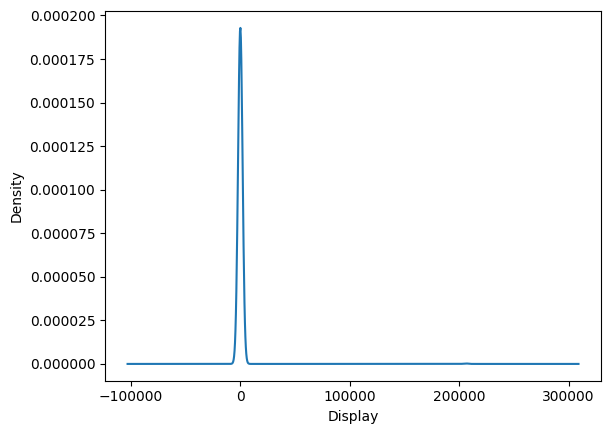

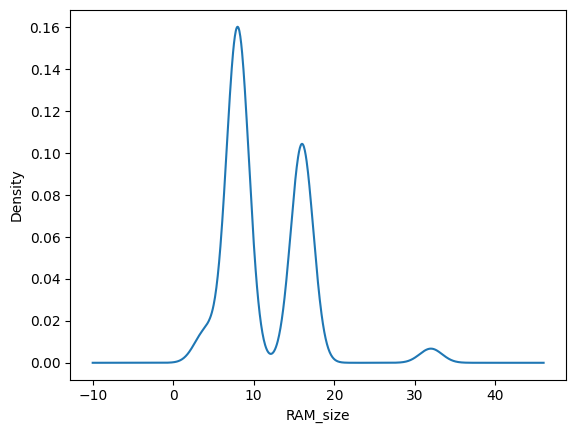

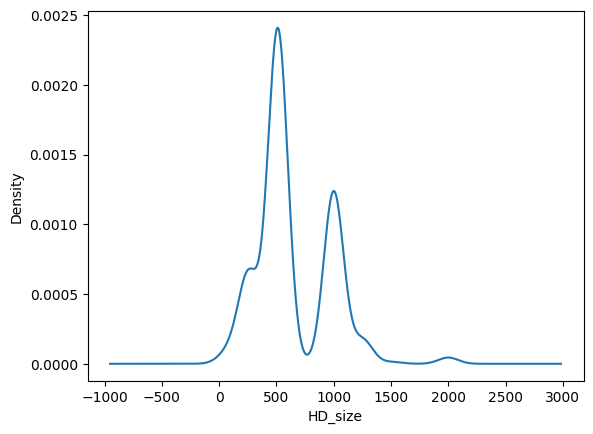

In [87]:

for i in range(0, len(n_features)):        
    df[n_features[i]].plot(kind='kde')
    plt.xlabel(n_features[i])
    plt.show()


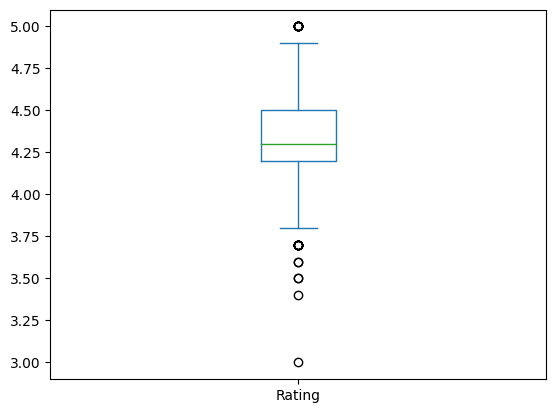

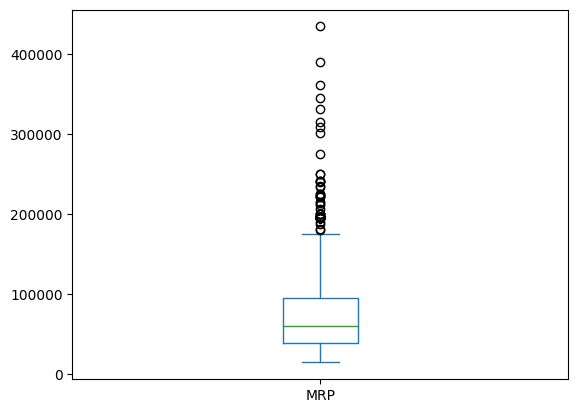

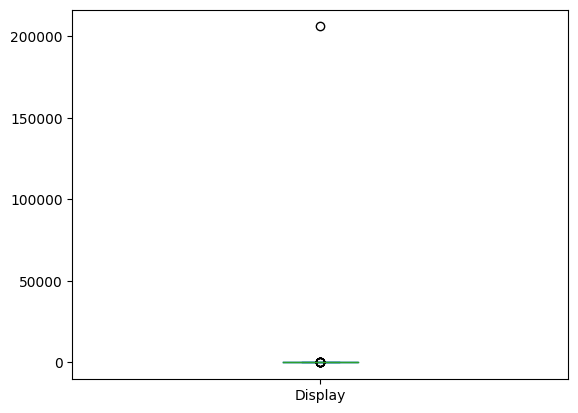

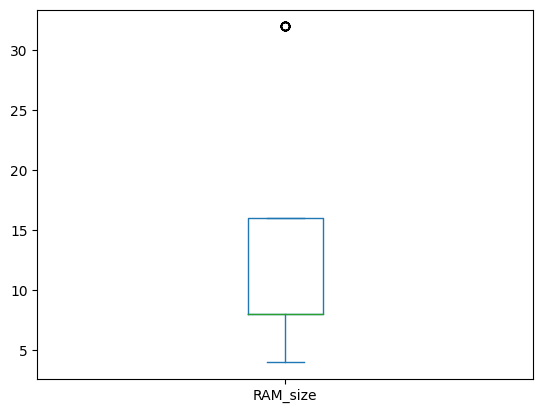

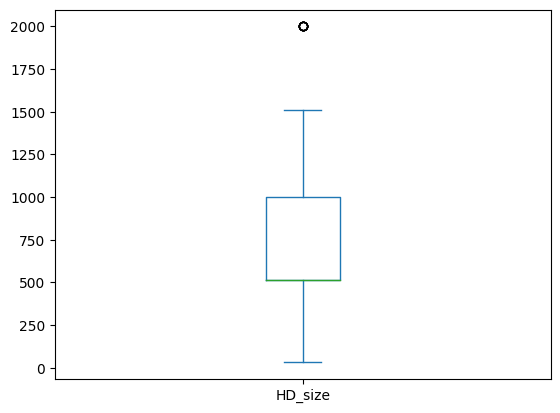

In [89]:
#outliers
for i in range(0, len(n_features)):        
    df[n_features[i]].plot(kind='box')
    plt.show()

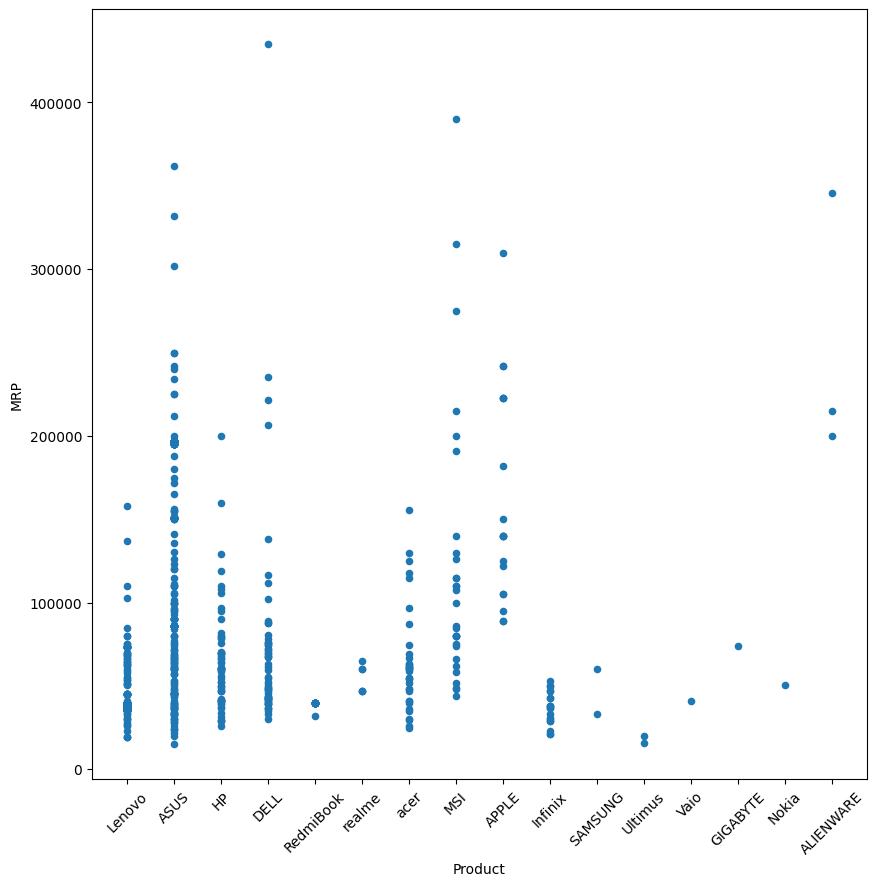

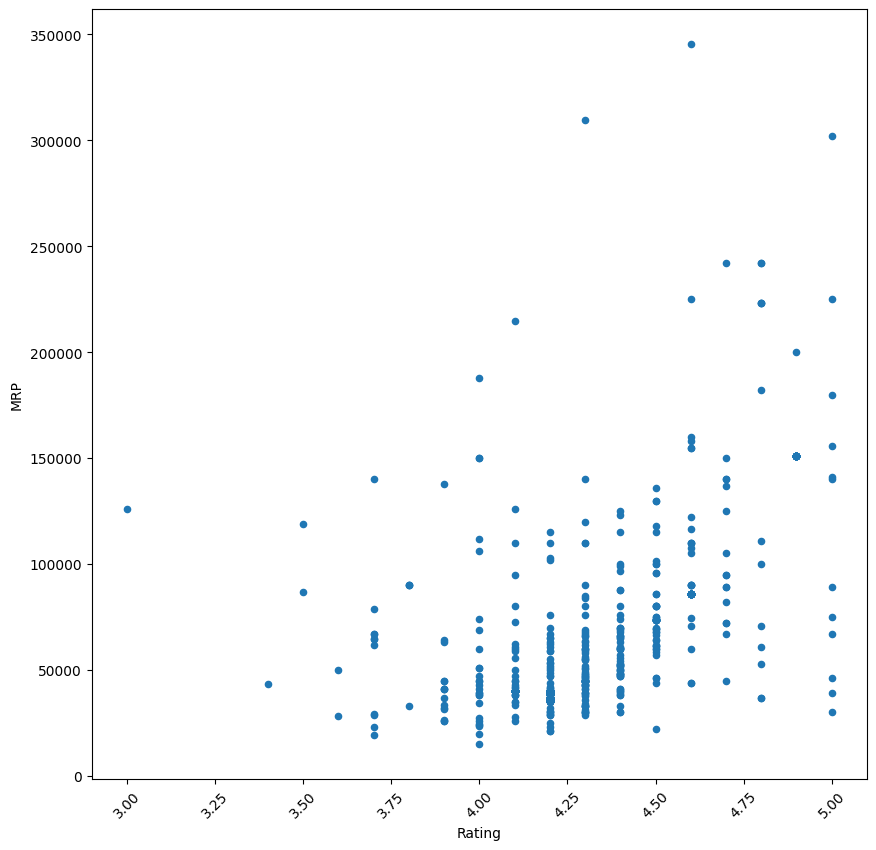

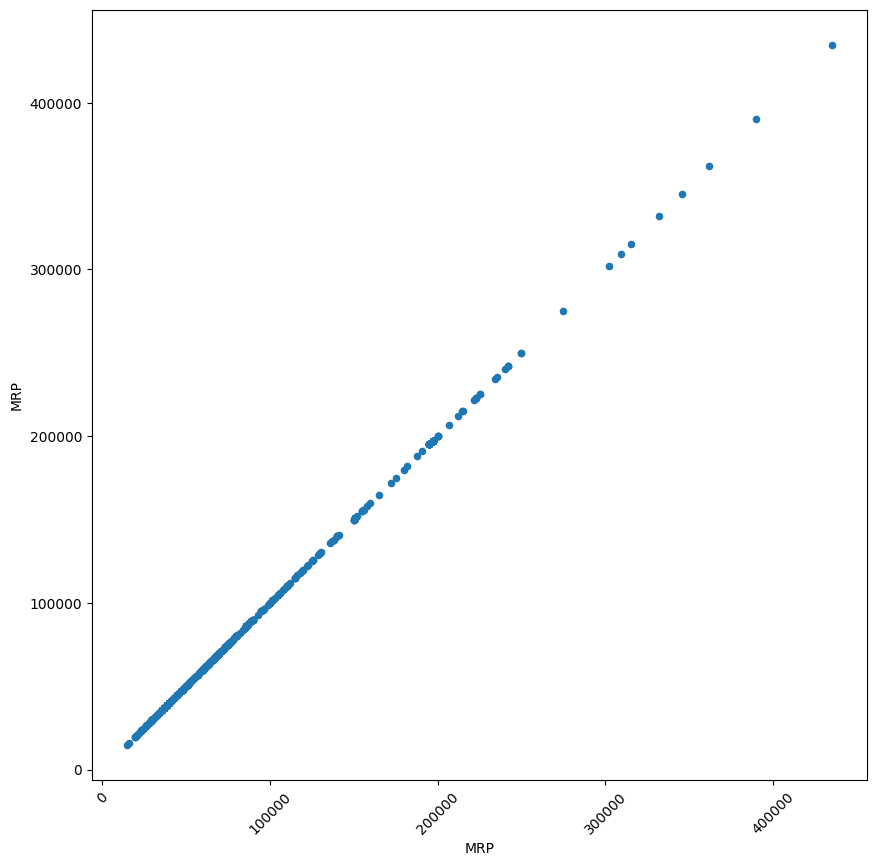

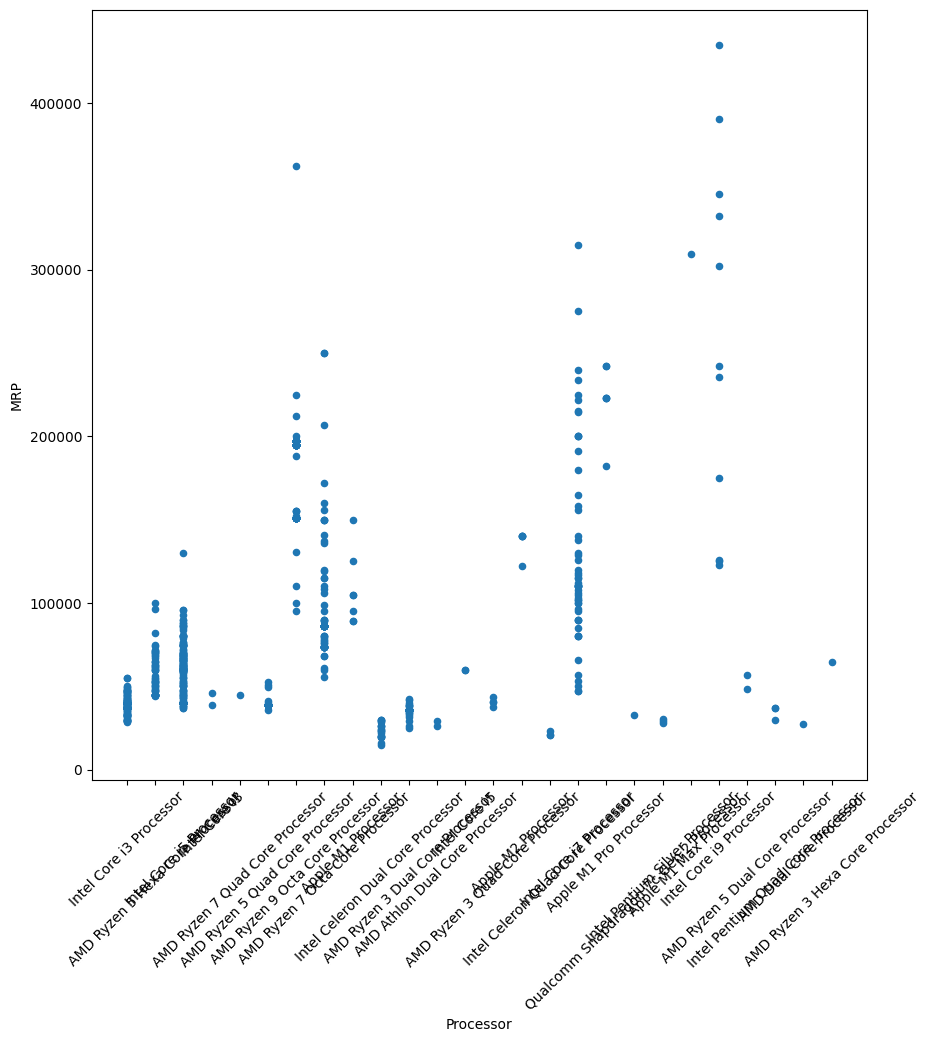

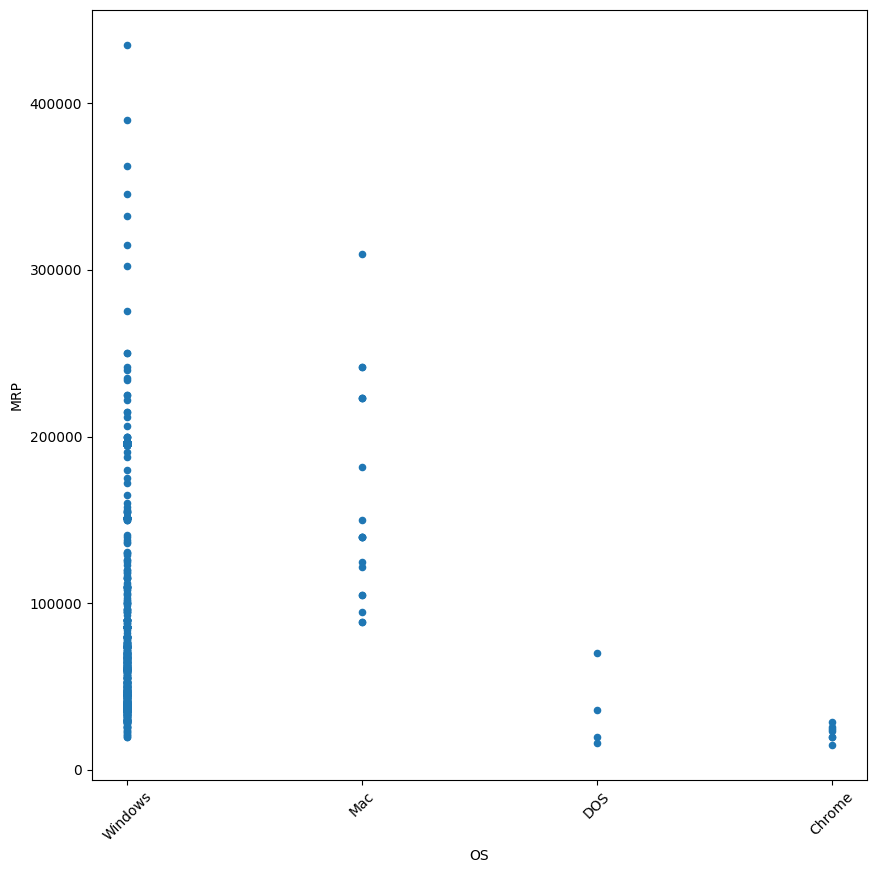

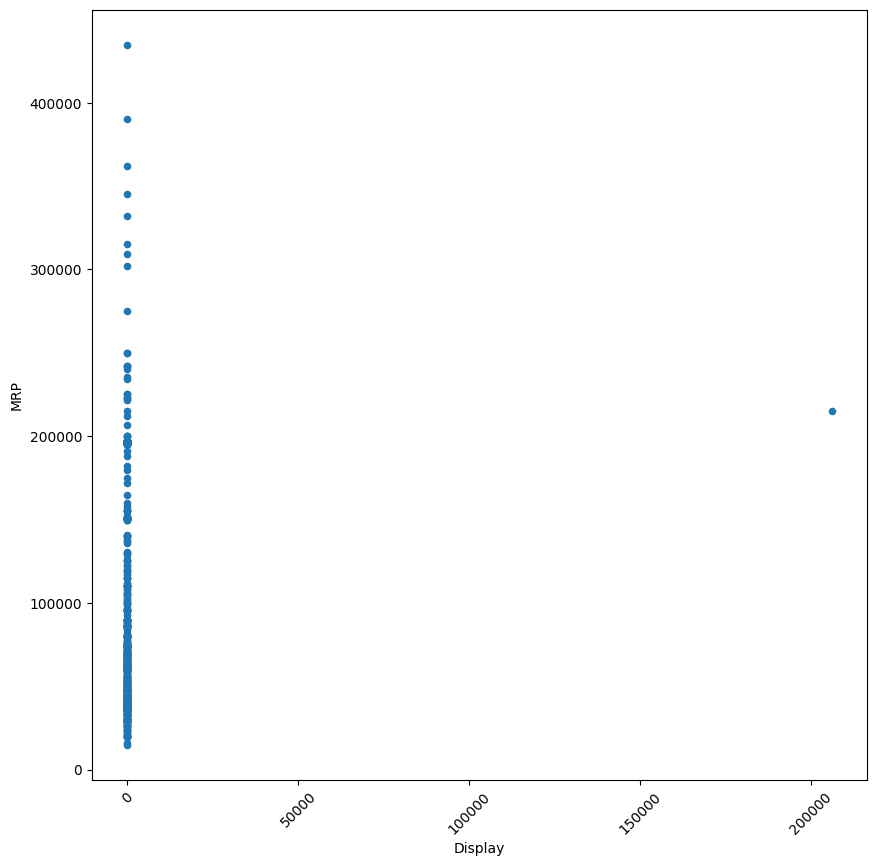

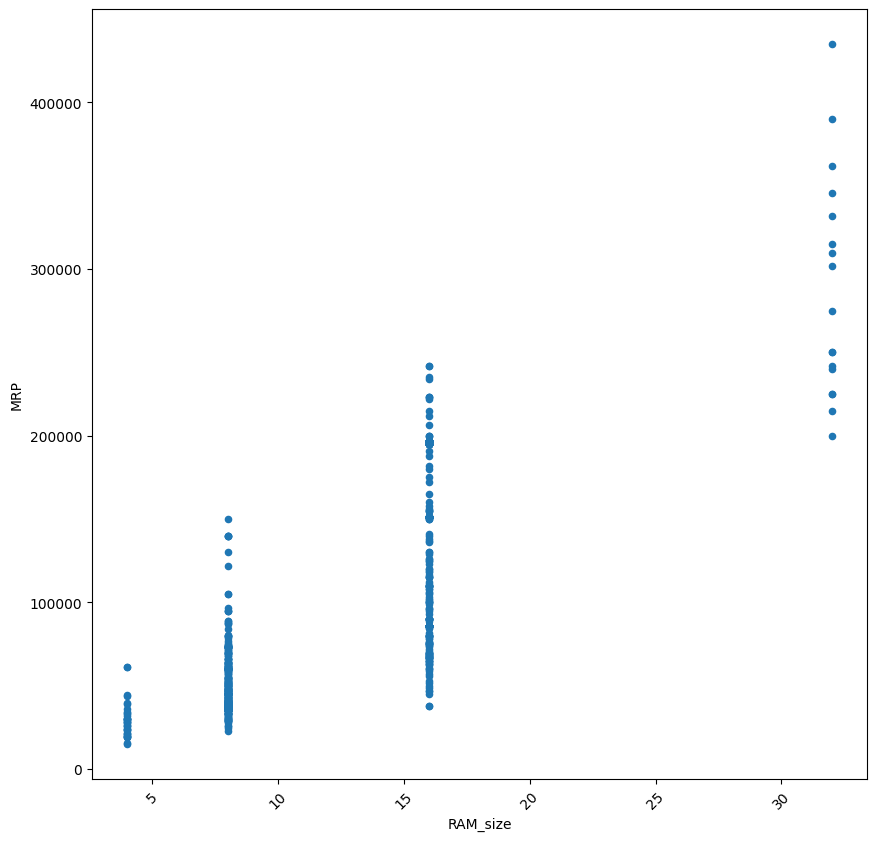

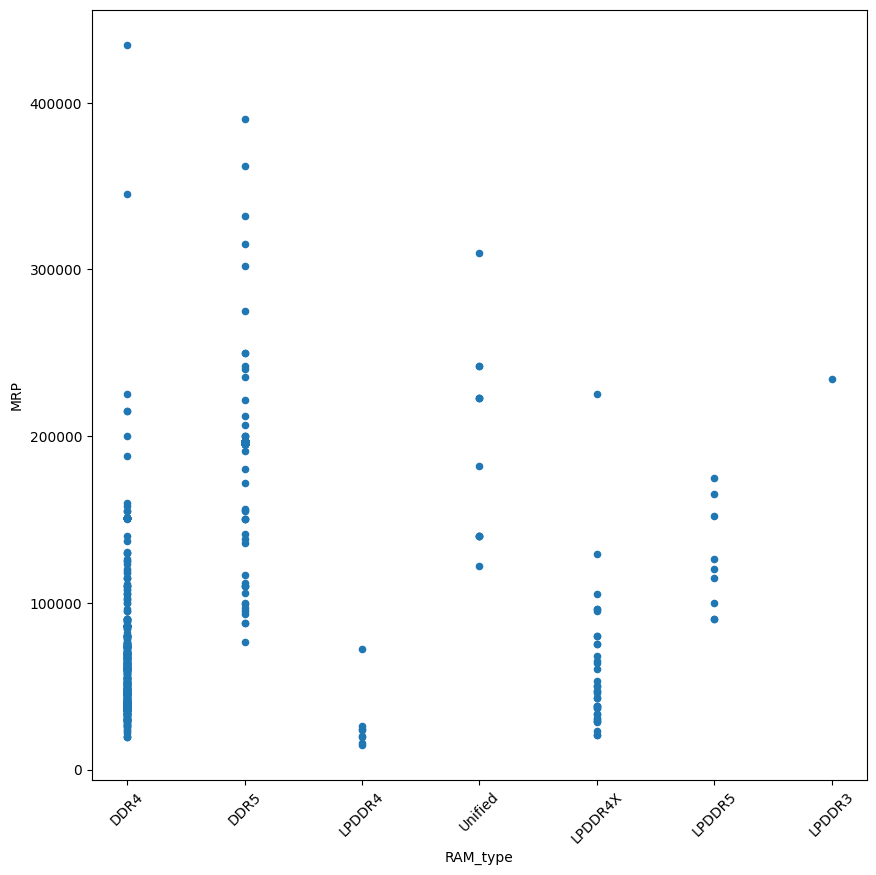

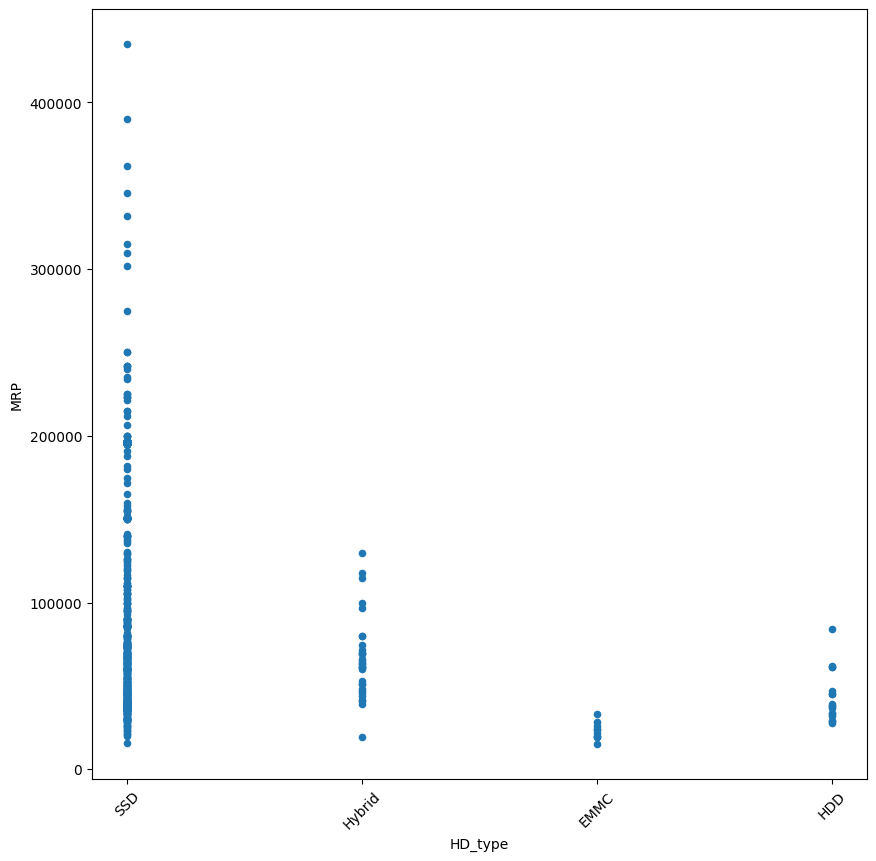

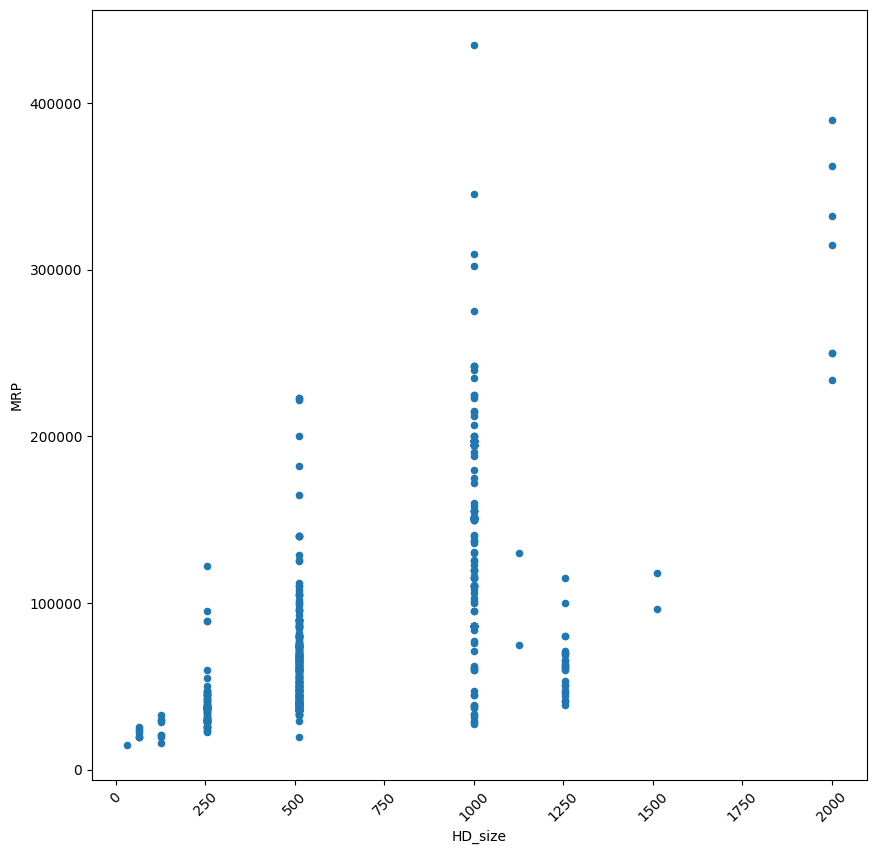

In [90]:
for feature in df.columns:
    df.plot(kind='scatter', x=feature, y= 'MRP', figsize=(10,10))
    plt.xticks(rotation=45)
    plt.show()

A laptop's price is positively correlated with the amount of RAM and hard drive space.
The type of processor, HD, and RAM does matter, but because the price depends on other parameters, there isn't a clear trend in the pricing of laptops.
Brand is another important consideration; some manufacturers specialise in affordable laptops, some cater to a certain community, while yet others offer a wide selection of laptops.
Core count, graphics processing unit (GPU), and other factors that are important for determining price are not taken into account in the dataset.

In [91]:
df2 = df.copy()

In [92]:
df2.HD_type[df2.HD_type==0]

Series([], Name: HD_type, dtype: object)

<Axes: ylabel='Density'>

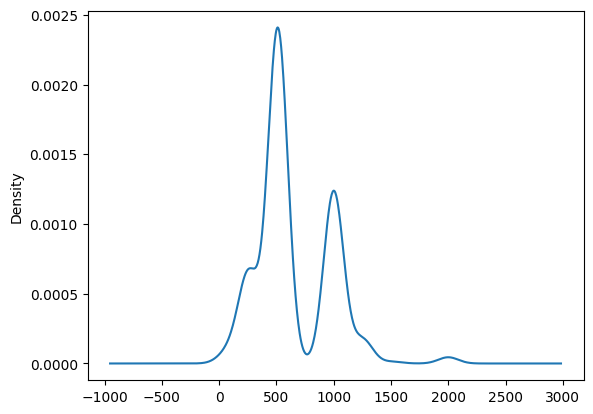

In [93]:
df2['HD_size'].plot(kind='kde')

In [94]:

HD_type_endict = {'HDD':1,
                  'EMMC':1.5,
                  'SSD':2,
                  'Hybrid':3}
df2['HD_type'] = df2.HD_type.map(HD_type_endict)

In [96]:
df2.HD_type

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
715    1.5
716    2.0
717    2.0
718    2.0
719    3.0
Name: HD_type, Length: 720, dtype: float64

In [97]:
df2.RAM_type.unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [98]:

RAM_type_endict = {'LPDDR3':1,
                   'DDR4':2, 'LPDDR4':2, 'LPDDR4X':2,
                   'DDR5':3, 'LPDDR5':3,
                   'Unified':4
                  }
df2['RAM_type'] = df.RAM_type.map(RAM_type_endict)

In [99]:
df2.RAM_type

0      2
1      2
2      2
3      2
4      2
      ..
715    2
716    2
717    3
718    3
719    2
Name: RAM_type, Length: 720, dtype: int64

In [100]:
df2.drop(columns='Rating', inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   MRP        720 non-null    int64  
 2   Processor  720 non-null    object 
 3   OS         720 non-null    object 
 4   Display    718 non-null    float64
 5   RAM_size   720 non-null    int64  
 6   RAM_type   720 non-null    int64  
 7   HD_type    720 non-null    float64
 8   HD_size    720 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 50.8+ KB


In [102]:
df.HD_type.unique()

array(['SSD', 'Hybrid', 'EMMC', 'HDD'], dtype=object)

<Axes: ylabel='Density'>

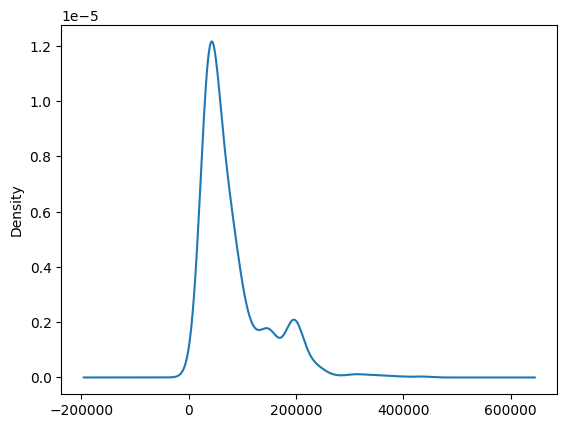

In [103]:
df['MRP'].plot(kind='kde')

In [105]:
import numpy as np

In [107]:
df2['MRP']=np.log(df2.MRP)

<Axes: ylabel='Density'>

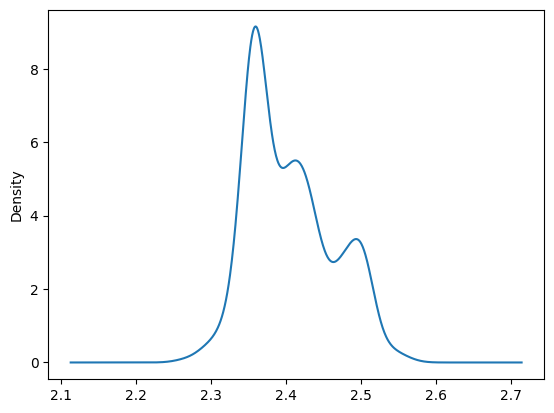

In [108]:
df2['MRP'].plot(kind='kde')

In [117]:
y = df2['MRP']
df2.drop(columns=['MRP'], inplace=True)

In [109]:
df2.Processor.unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel Core i3',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Core i5',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Intel Pentium Silver Processor', 'Apple M1 Max Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [110]:
processor_endict = {'Qualcomm Snapdragon 7c Gen 2':1, 'Intel Pentium':1, 'Intel Celeron':1, 'AMD':1, 'AMD Athlon':1,
                   'Intel Core i3':2, 'AMD Ryzen 3':2,
                   'Intel Core i5':3, 'AMD Ryzen 5':3,
                   'Intel Core i7':4, 'AMD Ryzen 7':4,
                   'Intel Core i9':5, 'AMD Ryzen 9':5,
                   'Apple M1':6, 'Apple M1 Max':6, 'Apple M1 Pro':6,
                   'Apple M2':7}
df2['Processor'] = df2.Processor.map(processor_endict)

In [111]:
product_endict = {'Ultimus':1, 'Infinix':1,
                 'Lenovo':2, 'ASUS':2, 'realme':2,'acer':2,'RedmiBook':2, 'Vaio':2, 'Nokia':2,
                 'GIGABYTE':2,'MSI':2, 'HP':2, 'DELL':2, 'SAMSUNG':2,
                 'ALIENWARE':3, 'APPLE':3}
df2['Product'] = df2.Product.map(product_endict)

In [112]:
df2.Product.unique()

array([2, 3, 1])

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=36)

In [119]:
encode = LabelEncoder()

In [120]:
X_train['OS'] = encode.fit_transform(X_train['OS'])

In [121]:
X_test['OS'] = encode.transform(X_test['OS'])

In [122]:
X_test

,Product,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
547,2,NaN,3,15.6,8,2,2.0,512
27,2,NaN,3,15.6,16,3,2.0,1000
180,2,NaN,3,15.6,8,2,2.0,512
620,2,NaN,3,15.6,8,2,2.0,512
183,1,NaN,3,14.0,4,2,2.0,128
...,...,...,...,...,...,...,...,...
690,2,NaN,3,15.6,16,2,2.0,1000
114,2,NaN,3,15.6,8,2,2.0,256
711,2,NaN,3,15.6,16,2,2.0,1000
360,2,NaN,3,14.0,8,2,2.0,256


In [124]:
scaler = MinMaxScaler(feature_range=(0,1))

In [125]:
X_train.columns

Index(['Product', 'Processor', 'OS', 'Display', 'RAM_size', 'RAM_type',
       'HD_type', 'HD_size'],
      dtype='object')

In [126]:
scaled_features = X_train.columns
X_train[scaled_features] = scaler.fit_transform(X_train[scaled_features].values)
X_test[scaled_features] = scaler.transform(X_test[scaled_features].values)

In [127]:
y_scaler = StandardScaler()

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train.columns=['MRP']
y_test.columns=['MRP']

In [128]:
for feature in X_train.columns:
    print(feature, X_train[feature].corr(y_train['MRP']))

Product 0.1718639175512601
Processor 0.968585533410342
OS -0.1110656518508613
Display 0.04755356691496398
RAM_size 0.021231048905173938
RAM_type 0.06944032272790517
HD_type -0.023711407845304042
HD_size 0.04141876890062562


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import math
import pickle

In [130]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}\nmae: {mae}\nrmse: {rmse}")

mse: 0.08767312071617443
mae: 0.23563200636345144
rmse: 0.2960964719752237


In [ ]:
r2_score(y_test, y_pred)

0.9156655830648619

In [ ]:
data = [['Lenovo','Intel Core i3','Windows',11.6,4,'LPDDR3','SSD',64]]
df_sample = pd.DataFrame(data, columns=['Product','Processor', 'OS', 'Display', 'RAM_size', 'RAM_type', 'HD_type', 'HD_size'])

In [ ]:
df2.Product.unique()

array([2, 3, 1], dtype=int64)

In [ ]:
df_sample.HD_size

0    64
Name: HD_size, dtype: int64

In [ ]:
df_sample['OS'] = encode.transform(df_sample['OS'])

In [ ]:
df_sample['Processor'] = df_sample.Processor.map(processor_endict)

In [ ]:
df_sample['Product'] = df_sample.Product.map(product_endict)

In [ ]:

df_sample['RAM_type'] = df_sample.RAM_type.map(RAM_type_endict)

In [ ]:

df_sample['HD_type'] = df_sample.HD_type.map(HD_type_endict)

In [ ]:
df_sample[scaled_features] = scaler.transform(df_sample[scaled_features].values)

In [ ]:
result=reg.predict(df_sample)

In [ ]:
output=y_scaler.inverse_transform(result)

In [ ]:
output

array([[10.97158605]])

In [ ]:
math.exp(output)

58196.82352459111

<AxesSubplot:xlabel='MRP'>

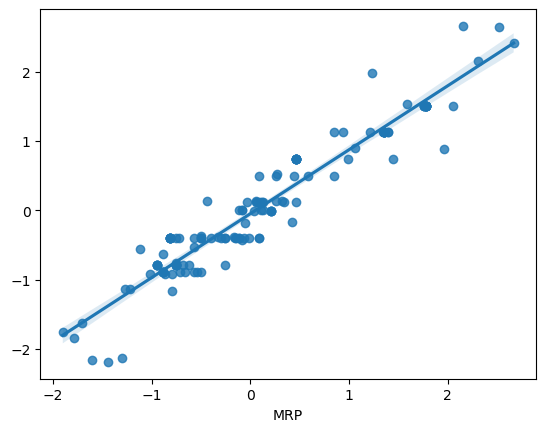

In [ ]:
sns.regplot(y_test, y_pred)

In [137]:
from sklearn.svm import SVR
svr = SVR()

In [ ]:
svr.fit(X_train, y_train)

SVR()

In [ ]:
yhat = svr.predict(X_test)

<AxesSubplot:xlabel='MRP'>

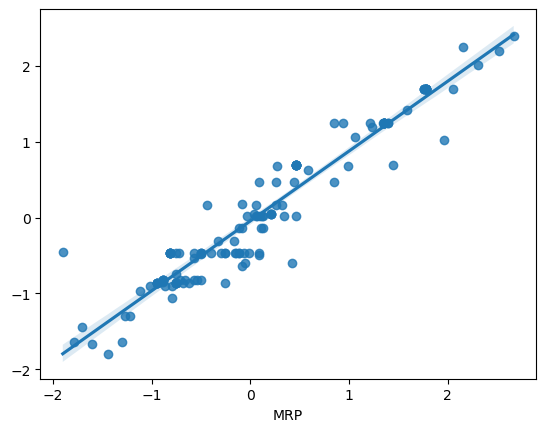

In [ ]:
sns.regplot(y_test, yhat)

In [ ]:
r2_score(y_test,yhat)

0.9195820844580905

In [ ]:
res=svr.predict(df_sample)

res.reshape(-1,1)

In [ ]:
res=y_scaler.inverse_transform(res.reshape(-1,1))

In [ ]:
math.exp(res)

115020.84746714169

In [ ]:
pickle.dump(svr,open('model.sav', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [ ]:
pickle.dump(y_scaler, open('y_scaler.sav', 'wb'))

In [ ]:
pickle.dump(encode, open('encode_os.sav', 'wb'))

In [ ]:
pickle.dump(reg, open('finalized_model.sav', 'wb'))

In [ ]:
model = pickle.load(open('finalized_model.sav', 'rb'))

In [ ]:
out = model.predict(df_sample)

In [ ]:
out = y_scaler.inverse_transform(out)

In [ ]:
math.exp(out)

58196.82352459111

In [ ]:
scal = pickle.load(open('scaler.sav', 'rb'))

In [ ]:
scal.transform(df_sample[scaled_features].values)

array([[0.5       , 0.16666667, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.01626016]])